*  A. It's likely that the dataset is skewed. Exploratory data analysis will highlight any data cleaning problems and outliers.
*  B. I would report the median for this dataset because it is more resistant to outliers.</li>
*  C. 284

In [1]:
#Import Python Libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Read csv file
df_orig = pd.read_csv("./2019 Winter Data Science Intern Challenge Data Set.csv")
df = df_orig

In [3]:
#Quick glance of the top 5 results
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [4]:
#Get some baseline info about each value, including possible null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


There are no null values, and the data types are sufficient for our analysis. Let's start by checking our hypothesis that the data is skewed with a histogram.

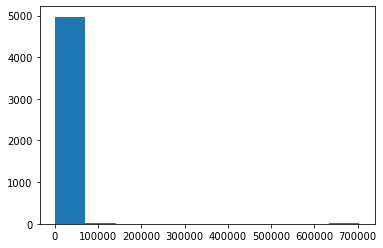

In [5]:
#Check normality of order_amount
plt.hist(df['order_amount']) # A histogram
plt.show()

This data is heavily skewed, which is inflating the mean of this dataset. We most likely should consider the median. Let's dive in to the descriptive statistics to make sure...

In [6]:
#Let's look at some descriptive statistics
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


The median (284) seems like a more appropriate measure of central tendency given the nature of the product. It looks like 75% of users are ordering 3 items or less, let's get some insight into these orders.

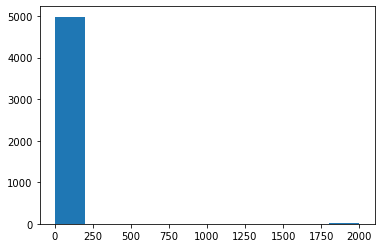

In [7]:
#Check normality of total_items 10
plt.hist(df['total_items']) # A histogram
plt.show()

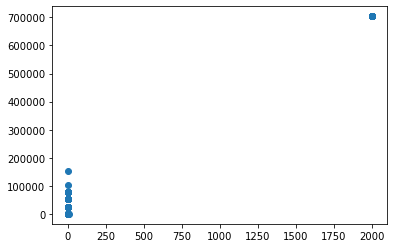

In [8]:
#Let's look at order amount vs. total items
plt.scatter(df['total_items'], df['order_amount']) # A scatterplot
plt.show()

In [9]:
#Let's look at orders with a quantity greater than 3
df.loc[df['total_items'] > 3].describe()

,order_id,shop_id,user_id,order_amount,total_items
count,397.000000,397.000000,397.000000,397.000000,397.000000
mean,2435.642317,49.372796,833.894207,31402.181360,89.720403
std,1436.831567,28.091249,96.321583,142741.610268,404.555030
min,16.000000,1.000000,607.000000,360.000000,4.000000
25%,1257.000000,26.000000,764.000000,536.000000,4.000000
50%,2394.000000,48.000000,830.000000,632.000000,4.000000
75%,3610.000000,70.000000,916.000000,712.000000,5.000000
max,4981.000000,100.000000,999.000000,704000.000000,2000.000000


Almost 20% of orders have more than 3 total items, but over 75% of those are still 5 items or less. Let's dig in a little more

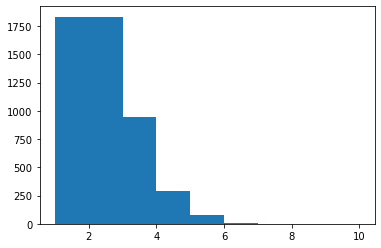

In [10]:
#Check normality of total_items 10 or less
plt.hist(df['total_items'], bins = [1,2,3,4,5,6,7,8,9,10]) # A histogram
plt.show()

It seems that most orders have less than 10 items. The dataset is still right-skewed. While unnecessary, I can't help but be curious about the outliers that are greater than 10.

In [11]:
#Let's look at orders with a total_items greater than 10
df.loc[df['total_items'] > 10].describe()

,order_id,shop_id,user_id,order_amount,total_items
count,17.000000,17.0,17.0,17.0,17.0
mean,2336.235294,42.0,607.0,704000.0,2000.0
std,1603.584872,0.0,0.0,0.0,0.0
min,16.000000,42.0,607.0,704000.0,2000.0
25%,1363.000000,42.0,607.0,704000.0,2000.0
50%,2154.000000,42.0,607.0,704000.0,2000.0
75%,3333.000000,42.0,607.0,704000.0,2000.0
max,4883.000000,42.0,607.0,704000.0,2000.0


User 607 made 17 purchases of 2000 items from shop 42. This seems like an outlier, let's check what happens to our descriptive statistics when we disregard this user:

In [12]:
#Descriptive statistics without user 607
df.loc[df['user_id'] != 607].describe()

,order_id,shop_id,user_id,order_amount,total_items
count,4983.000000,4983.000000,4983.000000,4983.000000,4983.00000
mean,2501.060405,50.106362,849.918322,754.091913,1.99398
std,1443.090253,29.051718,86.800308,5314.092293,0.98318
min,1.000000,1.000000,700.000000,90.000000,1.00000
25%,1250.500000,24.000000,776.000000,163.000000,1.00000
50%,2502.000000,50.000000,850.000000,284.000000,2.00000
75%,3750.500000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,154350.000000,8.00000


When we disregard this user, the mean order value is 754; however, the data is still right-skewed. The median purchase order stays the same at 284, supporting our hypothesis that median is a better measure of central tendency for this data.

Interestingly, a max of 154350 seems exceptional. What's going with a purchase for $154,350, and 8 items or less?

In [13]:
#First, let's look at orders without user 607
df.loc[df['user_id'] != 607].sort_values(['order_amount'], ascending=False).head(10)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
691,692,78,878,154350,6,debit,2017-03-27 22:51:43
2492,2493,78,834,102900,4,debit,2017-03-04 4:37:34
3724,3725,78,766,77175,3,credit_card,2017-03-16 14:13:26
1259,1260,78,775,77175,3,credit_card,2017-03-27 9:27:20
4420,4421,78,969,77175,3,debit,2017-03-09 15:21:35
2564,2565,78,915,77175,3,debit,2017-03-25 1:19:35
2906,2907,78,817,77175,3,debit,2017-03-16 3:45:46
4715,4716,78,818,77175,3,debit,2017-03-05 5:10:44
3403,3404,78,928,77175,3,debit,2017-03-16 9:45:05
4192,4193,78,787,77175,3,credit_card,2017-03-18 9:25:32


Shop 78 seems to have exceptionally large order amounts

In [14]:
df.loc[df['shop_id'] == 78].describe()

,order_id,shop_id,user_id,order_amount,total_items
count,46.000000,46.0,46.000000,46.000000,46.000000
mean,2663.021739,78.0,867.739130,49213.043478,1.913043
std,1338.520020,0.0,81.314871,26472.227449,1.029047
min,161.000000,78.0,707.000000,25725.000000,1.000000
25%,1428.250000,78.0,812.500000,25725.000000,1.000000
50%,2796.500000,78.0,866.500000,51450.000000,2.000000
75%,3720.250000,78.0,935.750000,51450.000000,2.000000
max,4919.000000,78.0,997.000000,154350.000000,6.000000


Let's see how our data looks when we disregard shop 78 and user 607

In [15]:
#Descriptive statistics without user 607
df2 = df.loc[(df['user_id'] != 607) & (df['shop_id'] != 78)]
df2.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000
mean,2499.551347,49.846465,849.752279,302.580514,1.994734
std,1444.069407,29.061131,86.840313,160.804912,0.982821
min,1.000000,1.000000,700.000000,90.000000,1.000000
25%,1248.000000,24.000000,775.000000,163.000000,1.000000
50%,2497.000000,50.000000,850.000000,284.000000,2.000000
75%,3751.000000,74.000000,925.000000,387.000000,3.000000
max,5000.000000,100.000000,999.000000,1760.000000,8.000000


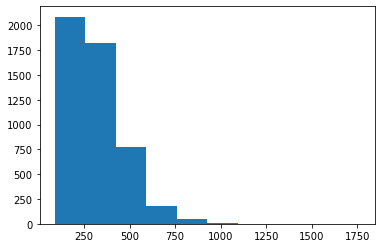

In [16]:
#Check normality of order amount without user 607 and shop 78
plt.hist(df2['order_amount']) # A histogram
plt.show()

After removing user 607 and shop 78, the mean order amount is 303, much more similar to the median of 284. While we've removed these outliers, the data is still right-skewed, supporting the need to use the median instead of the mean.

I can't help but be curious about user 607 and shop 78. Let's check to see if there is anything that we can identify...

In [17]:
#Shop 78 data
df.loc[df['shop_id'] == 78].sort_values(['order_amount'])

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
160,161,78,990,25725,1,credit_card,2017-03-12 5:56:57
4584,4585,78,997,25725,1,cash,2017-03-25 21:48:44
4505,4506,78,866,25725,1,debit,2017-03-22 22:06:01
4040,4041,78,852,25725,1,cash,2017-03-02 14:31:12
3780,3781,78,889,25725,1,cash,2017-03-11 21:14:50
3440,3441,78,982,25725,1,debit,2017-03-19 19:02:54
3151,3152,78,745,25725,1,credit_card,2017-03-18 13:13:07
3085,3086,78,910,25725,1,cash,2017-03-26 1:59:27
2922,2923,78,740,25725,1,debit,2017-03-12 20:10:58
2548,2549,78,861,25725,1,cash,2017-03-17 19:36:00


Other than the price per item, nothing stands out. Perhaps it's worth looking at their site to see if there is something more there?

In [18]:
#Now let's look at User 607
df.loc[df['user_id'] == 607].sort_values(['created_at'])

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
4646,4647,42,607,704000,2000,credit_card,2017-03-02 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00


It seems strange that all of their purchases are made at exactly 4:00:00.
Is there any relationship between user 607 and shop 42? Is there any relationship between shop 42 and time of purchase?

In [19]:
#Second, let's look at the shop
df.loc[df['shop_id'] == 42].sort_values(['user_id'])

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
4646,4647,42,607,704000,2000,credit_card,2017-03-02 4:00:00
4056,4057,42,607,704000,2000,credit_card,2017-03-28 4:00:00
3332,3333,42,607,704000,2000,credit_card,2017-03-24 4:00:00
2969,2970,42,607,704000,2000,credit_card,2017-03-28 4:00:00
2835,2836,42,607,704000,2000,credit_card,2017-03-28 4:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00
4868,4869,42,607,704000,2000,credit_card,2017-03-22 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00


There's something interesting happening here specific to user 607 that merits review beyond the information we have...